# 全連結NN : 手寫辨識

#### ●keras已經完全融入tensorflow中
#### ●MNIST 是數據集

In [116]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Step 1 讀數據集

#### ● MNIST 是有許多 0-9 的手寫數字圖庫，其中有 6 萬筆訓練資料, 1 萬筆測試資料，可以說是 Deep Learning 最有名的範例， 它被 Deep Learning 大師 Hinton 稱為「機器學習的果蠅」

In [117]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [118]:
#print(x_train[2])
#len(x_test)
#print(x_train[0])
#print(y_train[0]) #correct ans

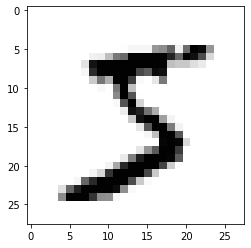

In [119]:
#把矩陣中的元素畫出
plt.imshow(x_train[0], cmap='Greys')

## Step 2 資料前處理

In [142]:
c = []
for i in x_train:
        aa = max(i)
        c.append(aa)
print(max(c))

255


In [121]:
# 希望數字都落在[0, 1]之間
new_x_train = x_train/255
new_x_test = x_test/255

### 拉平

In [122]:
#new_x_test.shape

In [123]:
new_x_train.shape

(60000, 28, 28)

In [124]:
new_x_train = new_x_train.reshape(60000,784) # 28*28=784

In [125]:
new_x_test = new_x_test.reshape(10000,784) # 28*28=784

### 處理輸出
#### ●用one hot encoding

In [126]:
y_train = to_categorical(y_train, 10) #10類

In [127]:
y_test = to_categorical(y_test, 10) #10類

In [144]:
#y_train[0]

## Step 3 打造神經網路

In [129]:
# 因為NN一層層
from tensorflow.keras.models import Sequential
# 每層可能是RNN, CNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [130]:
model = Sequential()

In [131]:
#input_dim=784
#87個神經元
model.add(Dense(87, input_dim=784, activation='relu'))

## 隱藏層
### 第一層

In [132]:
#87個神經元
model.add(Dense(87, activation='relu'))

### 第二層

In [145]:
#87個神經元
model.add(Dense(87, activation='relu'))

## 輸出層

In [134]:
# 用softmax因為希望輸出的數字都控制在[0, 1]間，且10個數字加起來是1
model.add(Dense(10, activation='softmax'))

### 組裝神經網路

In [135]:
model.compile(loss='mse', optimizer= SGD(lr=0.087), metrics=['accuracy'])

In [136]:
# 68295 = 784*87 + 87(bias)
#7656 = 87*87 + 87(bias)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 87)                68295     
_________________________________________________________________
dense_13 (Dense)             (None, 87)                7656      
_________________________________________________________________
dense_14 (Dense)             (None, 87)                7656      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                880       
Total params: 84,487
Trainable params: 84,487
Non-trainable params: 0
_________________________________________________________________


## Step 4 Training

In [137]:
#batch_size=100表示100個data調參數一次
#epochs=20表示訓練20次
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1525 - accuracy: 0.2336
Epoch 2/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1019 - accuracy: 0.4860
Epoch 3/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0897 - accuracy: 0.5484
Epoch 4/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0763 - accuracy: 0.6162
Epoch 5/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0737 - accuracy: 0.6293
Epoch 6/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0735 - accuracy: 0.6306
Epoch 7/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0723 - accuracy: 0.6368
Epoch 8/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0713 - accuracy: 0.6420
Epoch 9/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0705 - accuracy: 0.6461
Epoch 10/20
60

## Step 5 Testing

In [138]:
#輸出最大機率可能是哪個數字
result = model.predict_classes(x_test)

In [139]:
def show_predict(n):
    print('神經網路預測為:', result[n])
    #reshape(28,28) : reshape回來
    plt.imshow(x_test[n].reshape(28,28))

神經網路預測為: 6


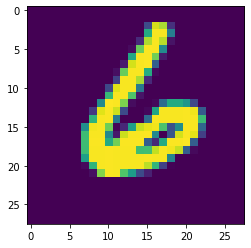

In [140]:
show_predict(8888)

In [146]:
#x_test[0].reshape(28,28)

### ?????可以寫一個辨識哪個錯誤的code